In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import auc

import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_columns',5000)
from IPython.display import Image
import os
encoder = LabelEncoder()

In [2]:
data = pd.read_csv("german.data",sep=' ', header = None) 

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
data.columns =['Status of existing checking account','Duration in month', 'Credit history', 'Purpose', 
              'Credit amount','Savings account/bonds','Present employment since',
              'Installment rate in percentage of disposable income',
              'Personal status and sex', 'Other debtors / guarantors','Present residence since', 'Property', 
              'Age', 'Other installment plans','Housing','Number of existing credits at this bank',
             'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker','Good_Bad']

In [5]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good_Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
data.shape

(1000, 21)

In [7]:
data=data.replace(['A11' , 'A12', 'A13', 'A14'], ['<0', '0-200', '>= 200', 'NA'])
data=data.replace(['A30' , 'A31', 'A32', 'A33','A34'], ['no credits taken/ all credits paid back duly', 'all credits at this bank paid back duly', 'existing credits paid back duly till now', 'delay in paying off in the past','critical account/ other credits existing (not at this bank)'])
data=data.replace(['A40' , 'A41', 'A42', 'A43','A44','A45','A46','A47','A48','A49','A410'], ['car(new)', 'car(used)', 'furniture/equipment', 'radio/television','domestic appliances','repairs', 'education','vacation/does not exist', 'retraining','business','others'])
data=data.replace(['A61' , 'A62', 'A63', 'A64','A65'], ['< 100', '100-500', '500-1000', '>1000','unknown/ no savings account'])
data=data.replace(['A71' , 'A72', 'A73', 'A74','A75'], ['unemployed', '< 1', '1-4', '4-7','>7'])
data=data.replace(['A91' , 'A92', 'A93', 'A94','A95'], ['male : divorced/separated', 'female : divorced/separated/married', 'male : single', 'male : married/widowed','female : single'])                       
data=data.replace(['A101' , 'A102', 'A103' ], ['none', 'co-applicant', 'guarantor'])
data=data.replace(['A121' , 'A122', 'A123','A124' ], ['real estate', 'building society savings agreement/ life insurance', 'car or other, not in attribute 6','unknown / no property'])
data=data.replace(['A141' , 'A142', 'A143'], ['bank', 'stores', 'none'])
data=data.replace(['A151' , 'A152', 'A153'], ['rent', 'own', 'for free']) 
data=data.replace(['A171' , 'A172', 'A173','A174'], ['unemployed/ unskilled - non-resident', 'unskilled - resident', 'skilled employee / official','management/ self-employed/highly qualified employee/ officer']) 
data=data.replace(['A191' , 'A192'], ['none', 'yes, registered under the customers name'])
data=data.replace(['A201' , 'A202'], ['Yes', 'No']) 

In [8]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good_Bad
0,<0,6,critical account/ other credits existing (not at this bank),radio/television,1169,unknown/ no savings account,>7,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,1
1,0-200,48,existing credits paid back duly till now,radio/television,5951,< 100,1-4,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,Yes,2
2,NA,12,critical account/ other credits existing (not at this bank),education,2096,< 100,4-7,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,Yes,1
3,<0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,4-7,2,male : single,guarantor,4,building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,Yes,1
4,<0,24,delay in paying off in the past,car(new),4870,< 100,1-4,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,2


In [9]:
data.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Good_Bad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status of existing checking account                         1000 non-null object
Duration in month                                           1000 non-null int64
Credit history                                              1000 non-null object
Purpose                                                     1000 non-null object
Credit amount                                               1000 non-null int64
Savings account/bonds                                       1000 non-null object
Present employment since                                    1000 non-null object
Installment rate in percentage of disposable income         1000 non-null int64
Personal status and sex                                     1000 non-null object
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Propert

In [11]:
Age1 = data['Age']
data['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [12]:
Age2 = list()
for Age in Age1:
    if Age <= 20:
        Age2.append('Child')
    elif Age >=21 and Age<=35:
        Age2.append('young')
    elif Age >=36 and Age<=50:
        Age2.append('Middle')
    else:
        Age2.append('Elder')
data = pd.concat([data, pd.DataFrame(Age2, columns=['Age in years'])], axis=1)
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good_Bad,Age in years
0,<0,6,critical account/ other credits existing (not at this bank),radio/television,1169,unknown/ no savings account,>7,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,1,Elder
1,0-200,48,existing credits paid back duly till now,radio/television,5951,< 100,1-4,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,Yes,2,young
2,NA,12,critical account/ other credits existing (not at this bank),education,2096,< 100,4-7,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,Yes,1,Middle
3,<0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,4-7,2,male : single,guarantor,4,building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,Yes,1,Middle
4,<0,24,delay in paying off in the past,car(new),4870,< 100,1-4,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,2,Elder


In [13]:
data.drop(labels=['Age'], axis = 1, inplace=True)

In [14]:
data.Good_Bad.value_counts()

1    700
2    300
Name: Good_Bad, dtype: int64

In [15]:
data.Good_Bad.value_counts(normalize=True)*100

1    70.0
2    30.0
Name: Good_Bad, dtype: float64

Text(0, 0.5, 'Good_Bad')

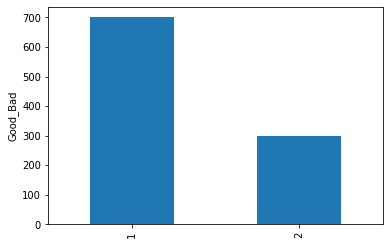

In [16]:
value=data['Good_Bad'].value_counts().plot(kind='bar')
plt.ylabel('Good_Bad')

#### From the above plot we can observe that 70% Good worthy and 30% bad worthy customers are there.

In [17]:
data.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job                                                         0
Number o

#### From the above information there are no null values in the dataset

In [18]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good_Bad,Age in years
0,<0,6,critical account/ other credits existing (not at this bank),radio/television,1169,unknown/ no savings account,>7,4,male : single,none,4,real estate,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,1,Elder
1,0-200,48,existing credits paid back duly till now,radio/television,5951,< 100,1-4,2,female : divorced/separated/married,none,2,real estate,none,own,1,skilled employee / official,1,none,Yes,2,young
2,NA,12,critical account/ other credits existing (not at this bank),education,2096,< 100,4-7,2,male : single,none,3,real estate,none,own,1,unskilled - resident,2,none,Yes,1,Middle
3,<0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,4-7,2,male : single,guarantor,4,building society savings agreement/ life insurance,none,for free,1,skilled employee / official,2,none,Yes,1,Middle
4,<0,24,delay in paying off in the past,car(new),4870,< 100,1-4,3,male : single,none,4,unknown / no property,none,for free,2,skilled employee / official,2,none,Yes,2,Elder


In [19]:
x=data.Good_Bad
x=pd.DataFrame(x)

from sklearn import preprocessing
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(x)

# 3. Transform
onehotlabels = enc.transform(x).toarray()
onehotlabels.shape
onehotlabels
onehotlabels=pd.DataFrame(onehotlabels)
onehotlabels.columns=['Good','Bad']
data = pd.concat([onehotlabels,data], axis=1)

data.head()


,Good,Bad,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good_Bad,Age in years
0,1.0,0.0,<0,6,critical account/ other credits existing (not at this bank),radio/television,1169,unknown/ no savings account,>7,4,male : single,none,4,real estate,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,1,Elder
1,0.0,1.0,0-200,48,existing credits paid back duly till now,radio/television,5951,< 100,1-4,2,female : divorced/separated/married,none,2,real estate,none,own,1,skilled employee / official,1,none,Yes,2,young
2,1.0,0.0,NA,12,critical account/ other credits existing (not at this bank),education,2096,< 100,4-7,2,male : single,none,3,real estate,none,own,1,unskilled - resident,2,none,Yes,1,Middle
3,1.0,0.0,<0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,4-7,2,male : single,guarantor,4,building society savings agreement/ life insurance,none,for free,1,skilled employee / official,2,none,Yes,1,Middle
4,0.0,1.0,<0,24,delay in paying off in the past,car(new),4870,< 100,1-4,3,male : single,none,4,unknown / no property,none,for free,2,skilled employee / official,2,none,Yes,2,Elder


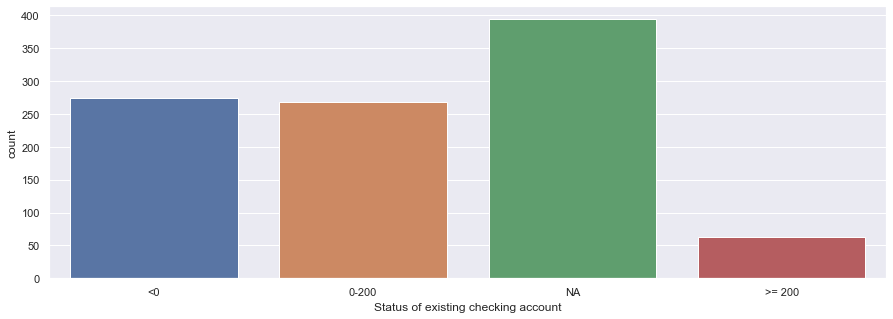

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="Status of existing checking account", data=data)
plt.show()

#### From the above plot status of accounts unknow for more customers

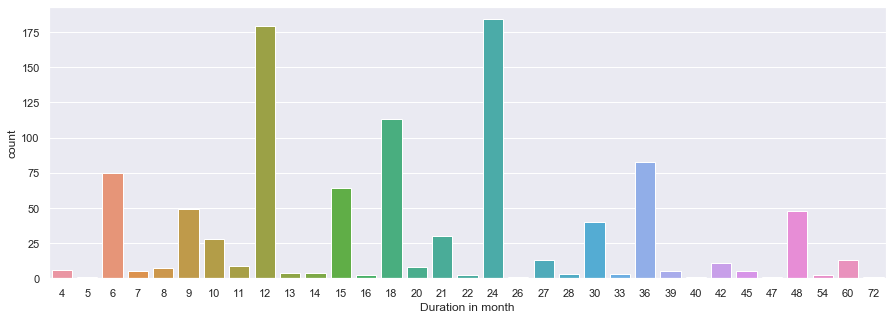

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="Duration in month", data=data)
plt.show()

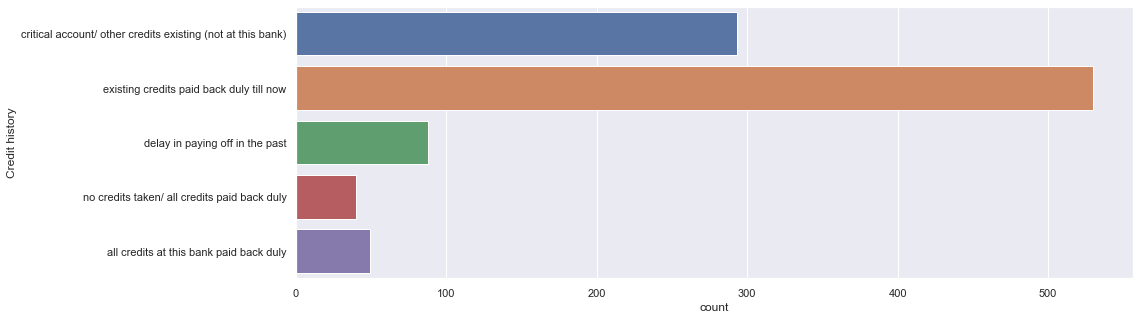

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Credit history", data=data)
plt.show()

#### From the above plots we can observe that existing credits paid back duly till now is more 

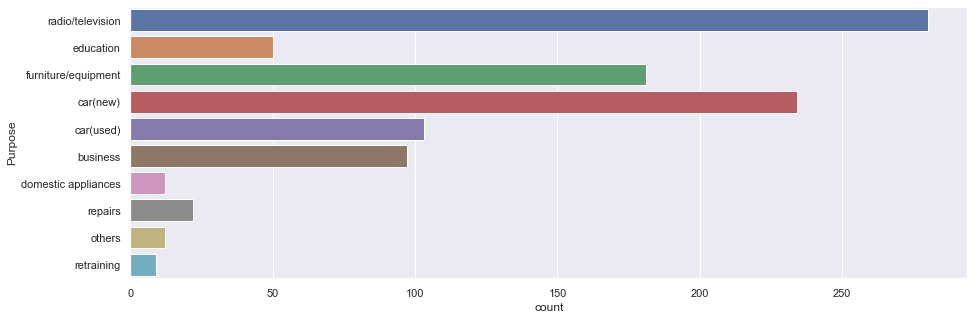

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Purpose", data=data)
plt.show()

#### From the above plot radio/television perpose is more.

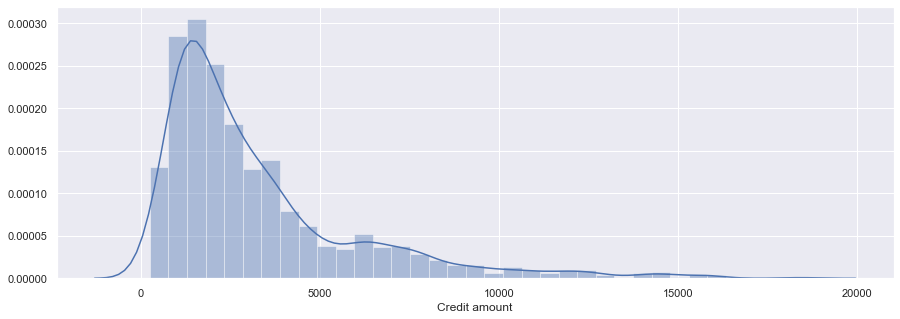

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
x = data['Credit amount']
x = pd.Series(x, name="Credit amount")
ax = sns.distplot(x)
plt.show()

#### From the above plot the credit amount between 0-5000 credit amount customers are more.

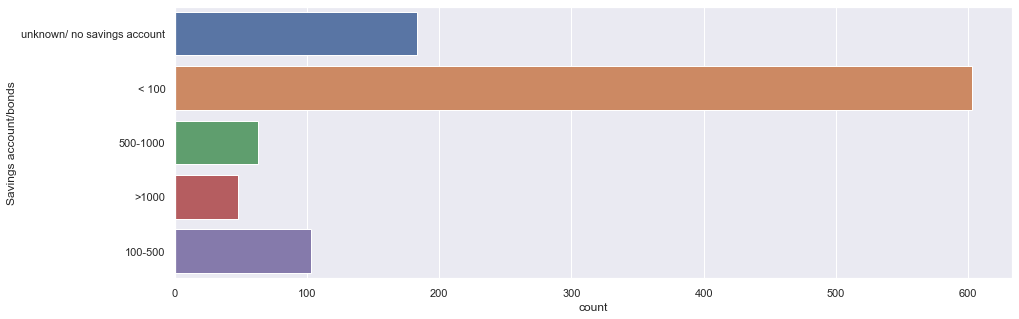

In [25]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Savings account/bonds", data=data)
plt.show()

#### From the above count plot we can observe that savings accounts <100 is more then others.

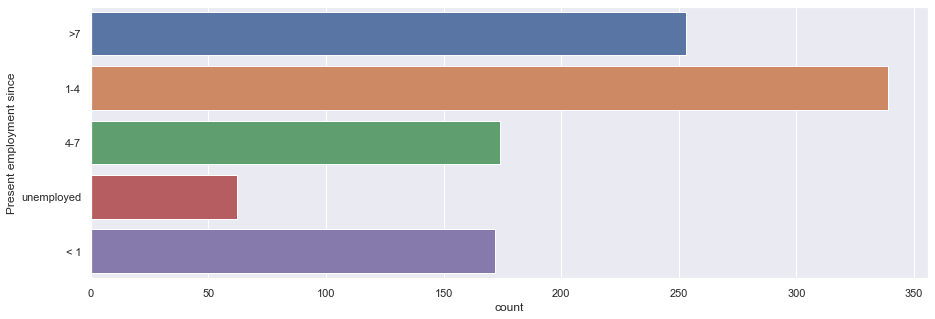

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Present employment since", data=data)
plt.show()

### We can boserve that employess with 1-4 years experience customers are more

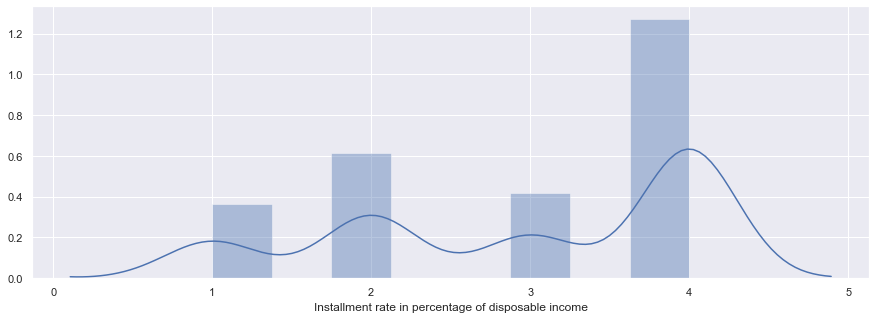

In [27]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
x=data['Installment rate in percentage of disposable income']
x = pd.Series(x, name="Installment rate in percentage of disposable income")
ax = sns.distplot(x)
plt.show()

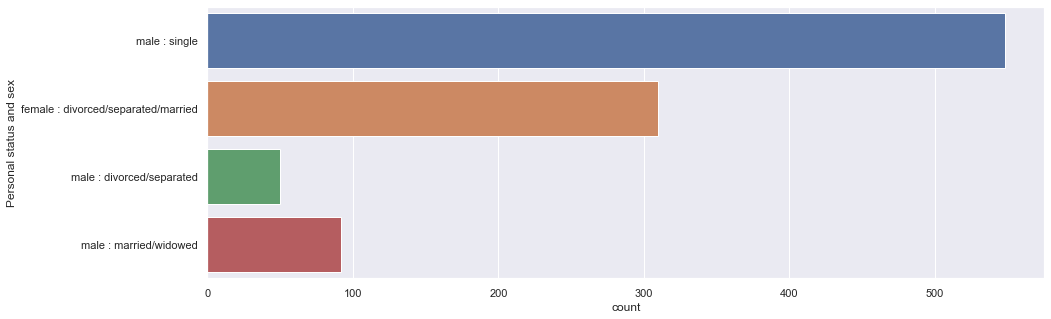

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Personal status and sex", data=data)
plt.show()

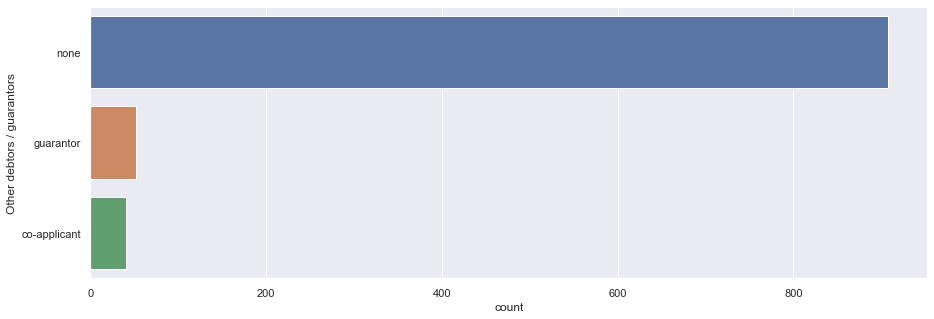

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Other debtors / guarantors", data=data)
plt.show()

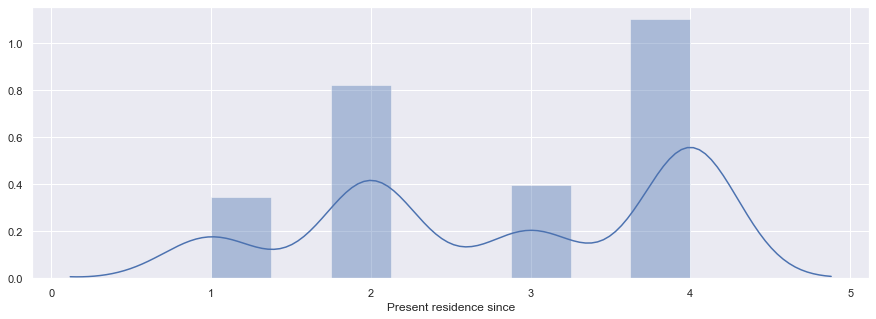

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
x=data['Present residence since']
x = pd.Series(x, name="Present residence since")
ax = sns.distplot(x)
plt.show()

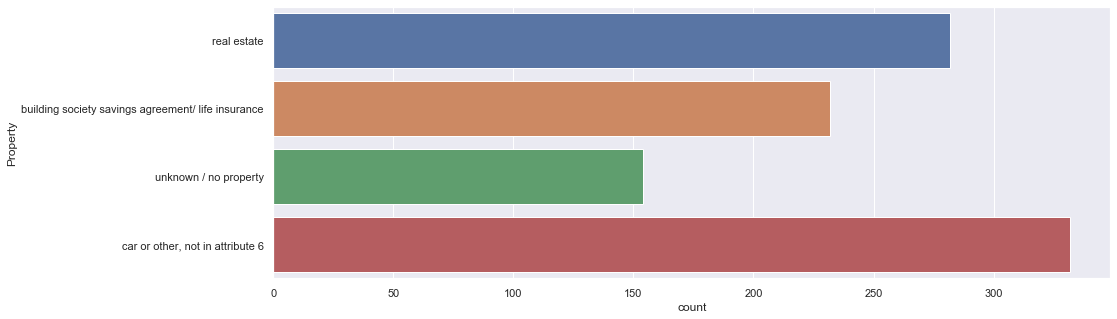

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Property", data=data)
plt.show()

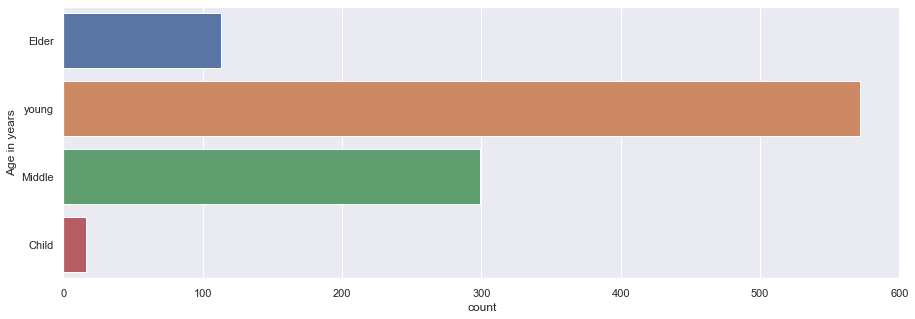

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Age in years", data=data)
plt.show()

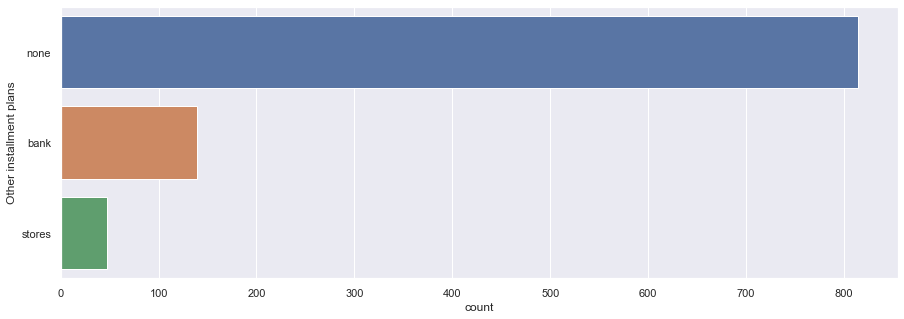

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Other installment plans", data=data)
plt.show()

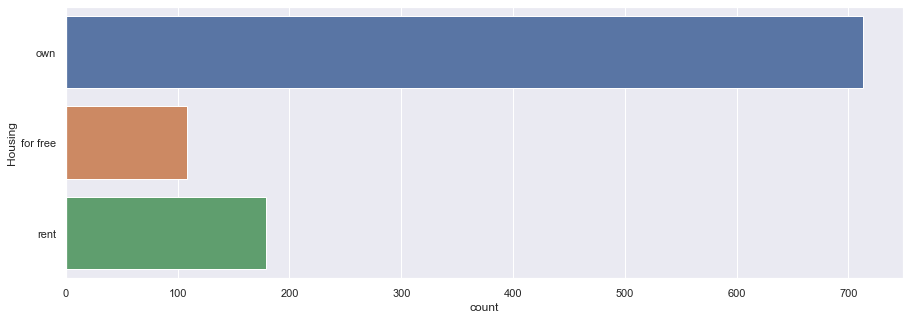

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Housing", data=data)
plt.show()

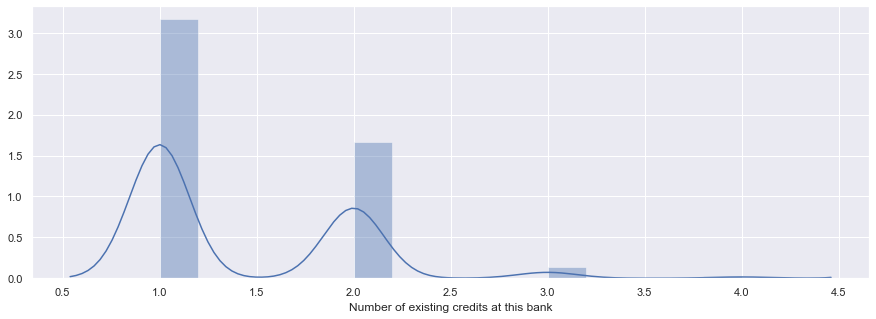

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
x=data['Number of existing credits at this bank']
x = pd.Series(x, name="Number of existing credits at this bank")
ax = sns.distplot(x)
plt.show()

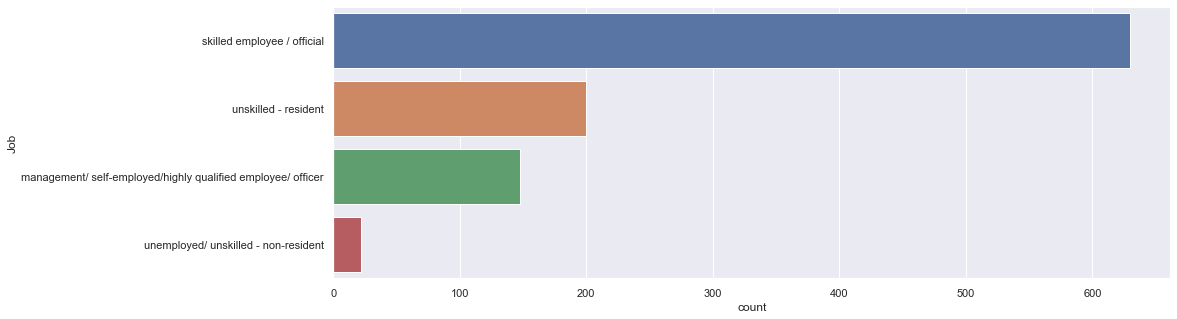

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Job", data=data)
plt.show()

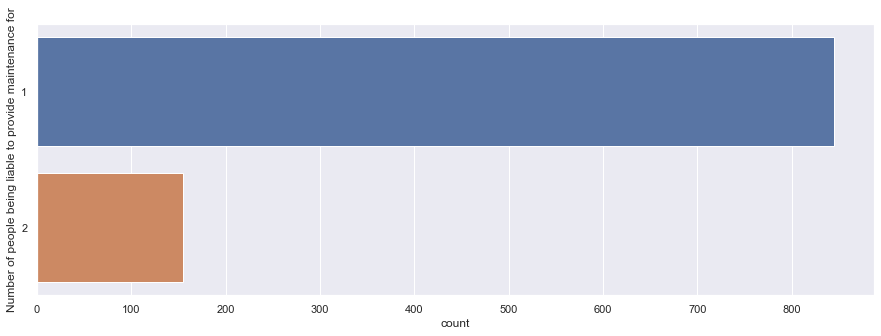

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Number of people being liable to provide maintenance for", data=data)
plt.show()

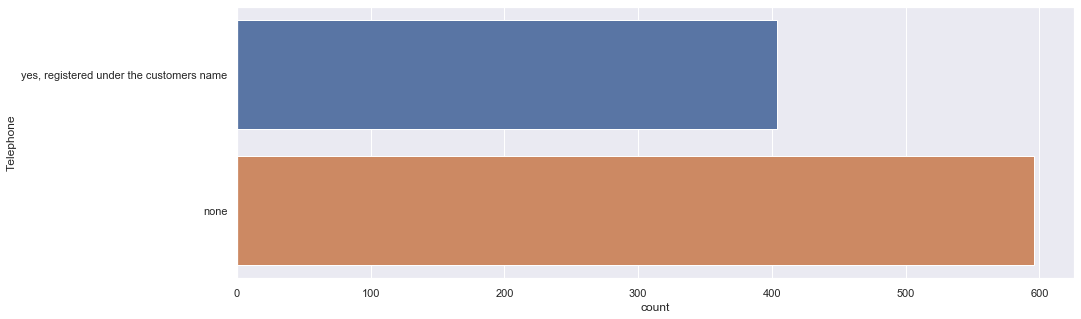

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="Telephone", data=data)
plt.show()

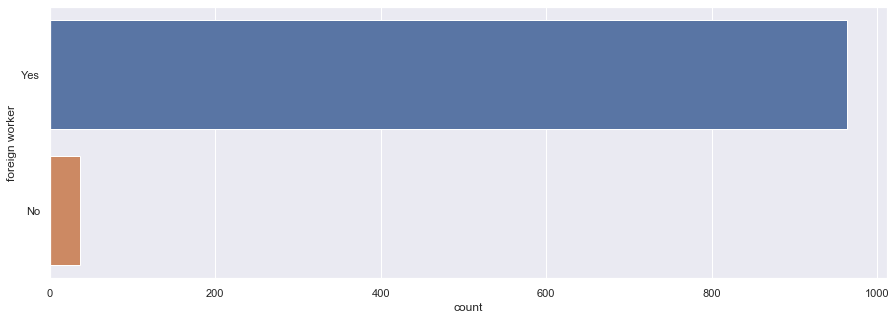

In [39]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(y="foreign worker", data=data)
plt.show()

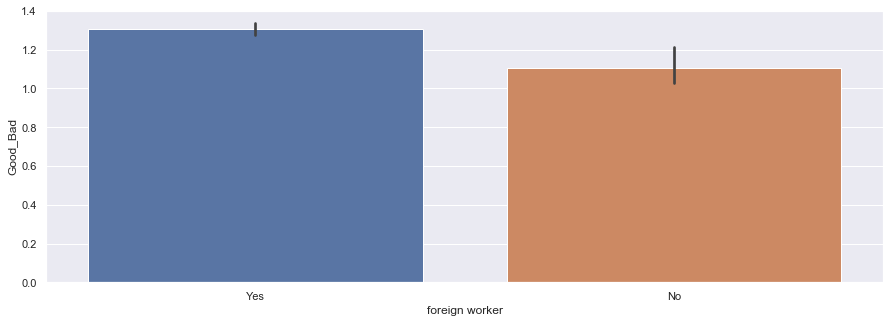

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="foreign worker", data=data)
plt.show()

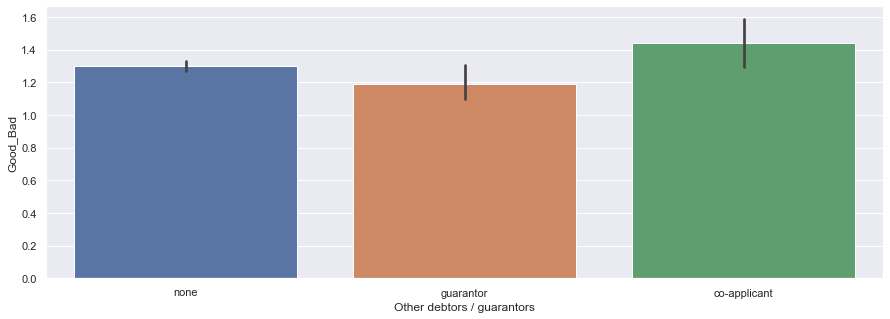

In [41]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Other debtors / guarantors", data=data)
plt.show()

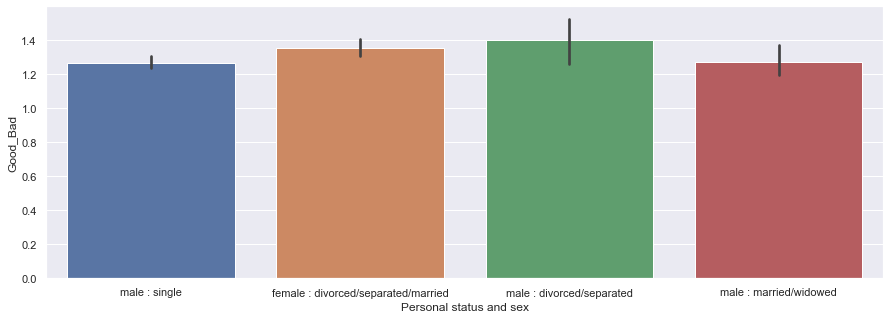

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Personal status and sex", data=data)
plt.show()

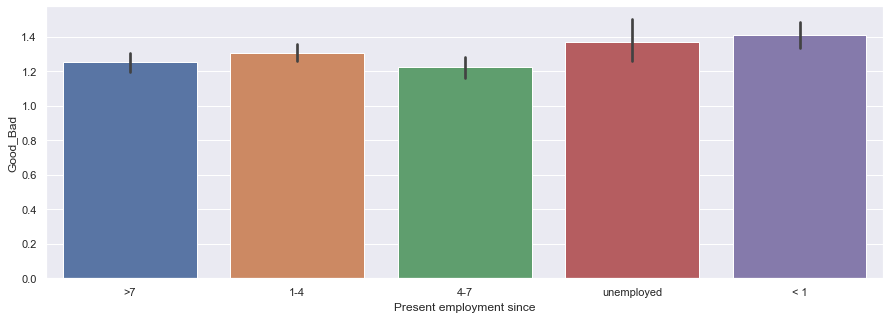

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Present employment since", data=data)
plt.show()

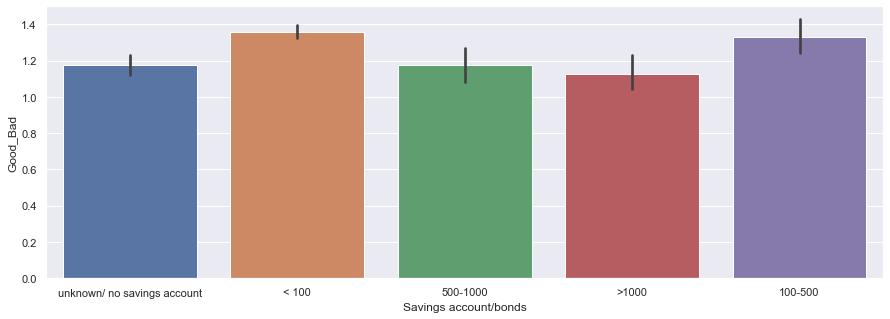

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Savings account/bonds", data=data)
plt.show()

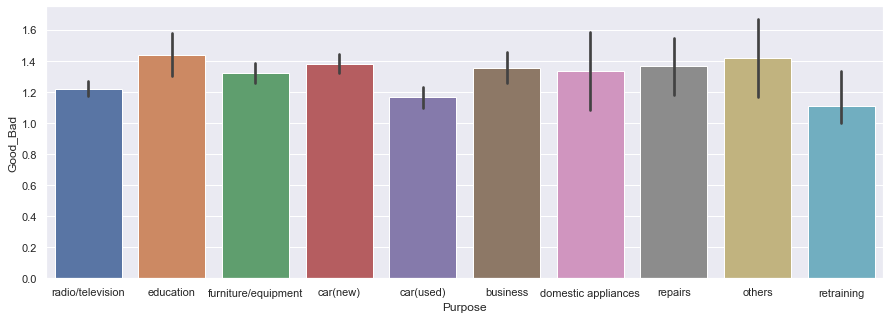

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Purpose", data=data)
plt.show()

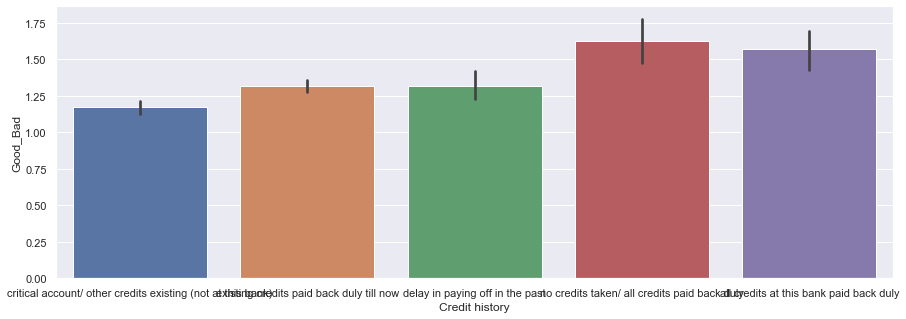

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Credit history", data=data)
plt.show()

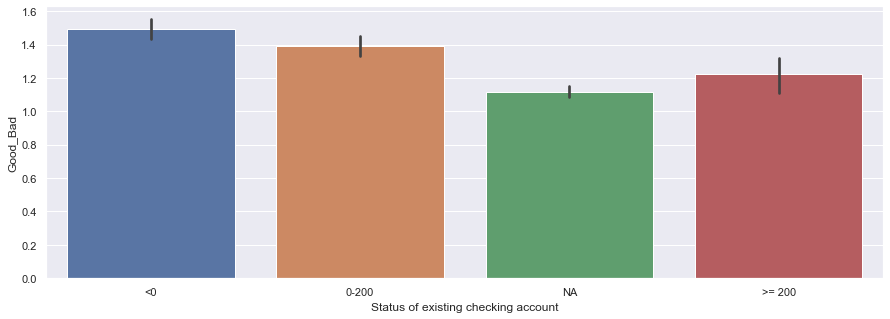

In [47]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Status of existing checking account", data=data)
plt.show()

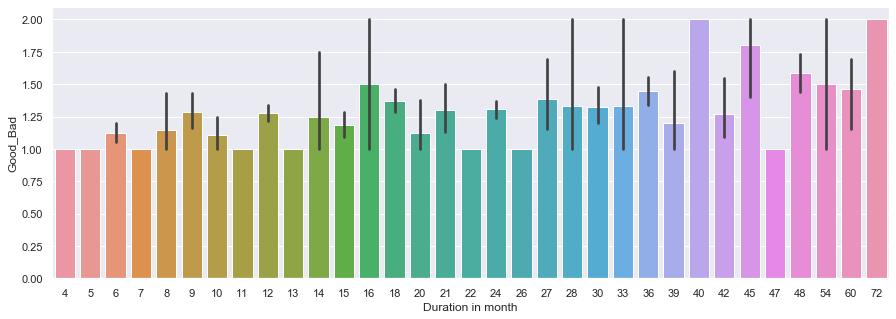

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Duration in month", data=data)
plt.show()

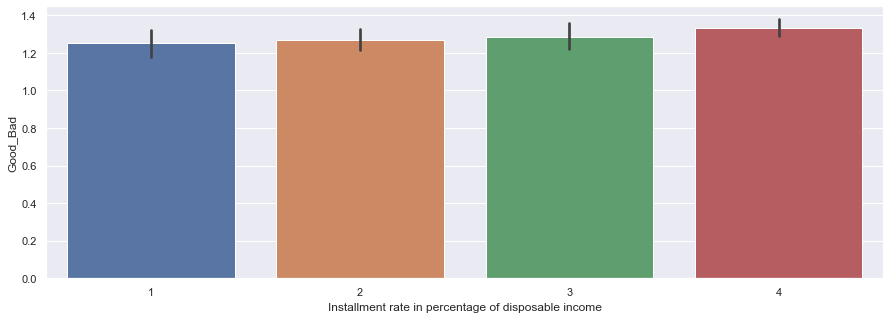

In [49]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Installment rate in percentage of disposable income", data=data)
plt.show()

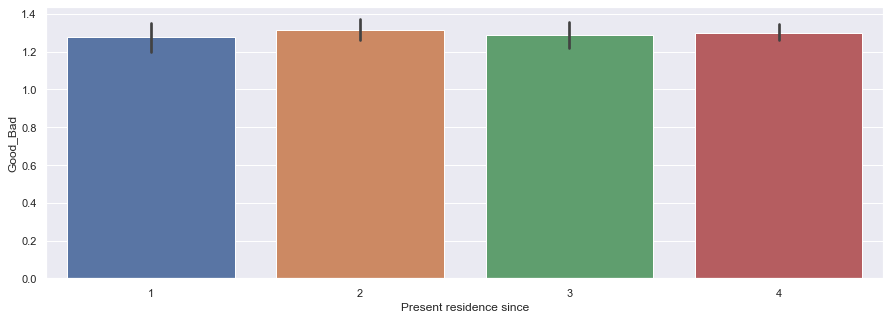

In [50]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Present residence since", data=data)
plt.show()

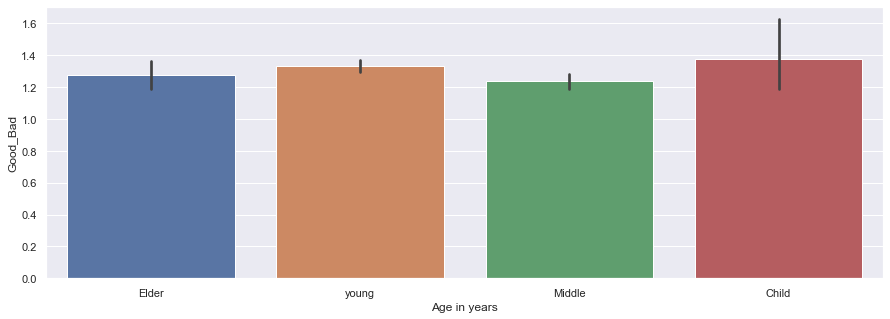

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Age in years", data=data)
plt.show()

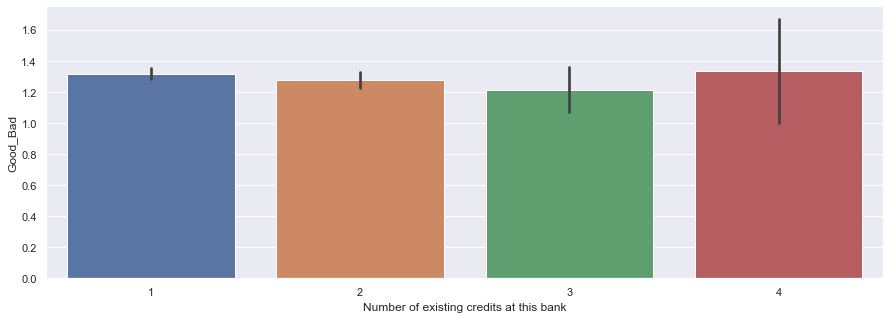

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="Good_Bad", x="Number of existing credits at this bank", data=data)
plt.show()

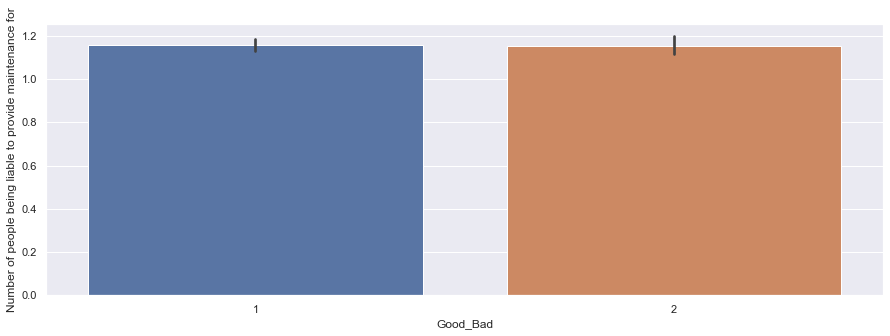

In [53]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(x="Good_Bad", y="Number of people being liable to provide maintenance for", data=data)
plt.show()

### Would a person with critical credit history, be more credit worthy?

<Figure size 1800x1080 with 0 Axes>

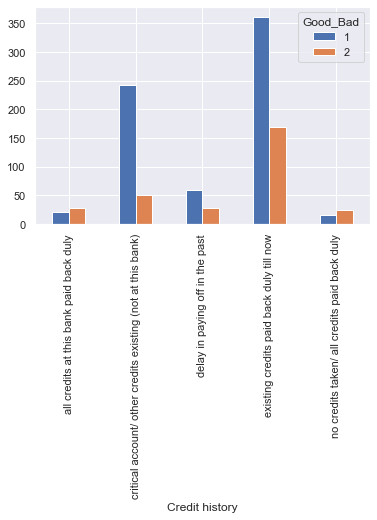

In [54]:
plt.figure(figsize=(25,15))
data.groupby(['Credit history','Good_Bad']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

### critical credits of the customer define the customer good or bad. 
#### From the above plot people with critical history can detrime person is credit worthy or not.

### Are young people more credit worthy?

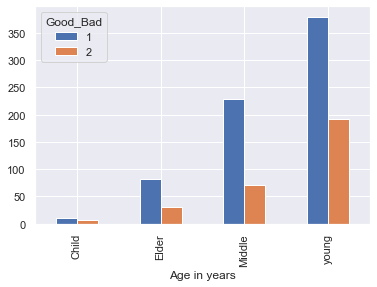

In [55]:
data.groupby(['Age in years','Good_Bad']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

In [ ]:
#### From the above plot we can observe that young people(20-35) are cridit worthy.

### Would a person with more credit accounts, be more credit worthy?

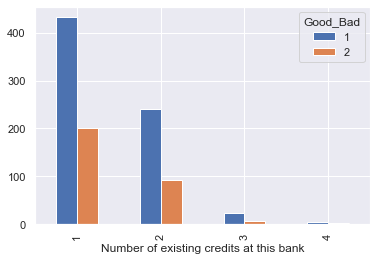

In [56]:
data.groupby(['Number of existing credits at this bank','Good_Bad']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

#### From the above plot we can observe that with existing less credit accounts person is more credit worthy.

In [57]:
data["Status of existing checking account"] = encoder.fit_transform(data["Status of existing checking account"])

In [58]:
data["Credit history"] = encoder.fit_transform(data["Credit history"])

In [59]:
data["Purpose"] = encoder.fit_transform(data["Purpose"])

In [60]:
data["Savings account/bonds"] = encoder.fit_transform(data["Savings account/bonds"])

In [61]:
data["Present employment since"] = encoder.fit_transform(data["Present employment since"])

In [62]:
data["Personal status and sex"] = encoder.fit_transform(data["Personal status and sex"])

In [63]:
data["Other debtors / guarantors"] = encoder.fit_transform(data["Other debtors / guarantors"])

In [64]:
data["Property"] = encoder.fit_transform(data["Property"])

In [65]:
data["Other installment plans"] = encoder.fit_transform(data["Other installment plans"])

In [66]:
data["Housing"] = encoder.fit_transform(data["Housing"])

In [67]:
data["Job"] = encoder.fit_transform(data["Job"])

In [68]:
data["Telephone"] = encoder.fit_transform(data["Telephone"])

In [69]:
data["foreign worker"] = encoder.fit_transform(data["foreign worker"])

In [70]:
data["Age in years"] = encoder.fit_transform(data["Age in years"])

In [71]:
data.head()

,Good,Bad,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good_Bad,Age in years
0,1.0,0.0,1,6,1,7,1169,4,3,4,3,2,4,2,1,1,2,1,1,1,1,1,1
1,0.0,1.0,0,48,3,7,5951,2,0,2,0,2,2,2,1,1,1,1,1,0,1,2,3
2,1.0,0.0,3,12,1,4,2096,2,1,2,3,2,3,2,1,1,1,3,2,0,1,1,2
3,1.0,0.0,1,42,3,5,7882,2,1,2,3,1,4,0,1,0,1,1,2,0,1,1,2
4,0.0,1.0,1,24,2,1,4870,2,0,3,3,2,4,3,1,0,2,1,2,0,1,2,1


### Split it into train and test

In [72]:
x = data.drop(['Good','Bad','Good_Bad'], axis=1)
y = data['Good_Bad']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=243)

In [73]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test)) 
print(np.shape(y_test))

(700, 20)
(700,)
(300, 20)
(300,)


In [74]:
x_train.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Other installment plans',
       'Housing', 'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Age in years'],
      dtype='object')

### Train 3 different prediction algorithms to predict credit worthiness of customers of a German bank

### Evaluate models performance

### Logistic Regression

In [75]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           1       0.76      0.86      0.80       210
           2       0.52      0.36      0.42        90

    accuracy                           0.71       300
   macro avg       0.64      0.61      0.61       300
weighted avg       0.68      0.71      0.69       300



In [76]:
roc_auc_score(y_test,y_pred_LR)
Model = ['Logistic Regression']
ROC_AUC_Accuracy = [roc_auc_score(y_test,y_pred_LR)]

In [77]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results=confusion_matrix(y_test,y_pred_LR)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred_LR) )
print ('Report : ')
print (classification_report(y_test,y_pred_LR) )

Confusion Matrix :
[[180  30]
 [ 58  32]]
Accuracy Score : 0.7066666666666667
Report : 
              precision    recall  f1-score   support

           1       0.76      0.86      0.80       210
           2       0.52      0.36      0.42        90

    accuracy                           0.71       300
   macro avg       0.64      0.61      0.61       300
weighted avg       0.68      0.71      0.69       300



In [78]:
#Function to visulise confusion matrix
def draw_cm( y_test,y_pred_LR ):
    cm = metrics.confusion_matrix( y_test,y_pred_LR )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [79]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,y_pred_LR )

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[180  30]
 [ 58  32]]


In [80]:
def create_conf_mat(y_test,y_pred_LR):
    if (len(y_test.shape) != len(y_pred_LR.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_LR.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                       columns = y_pred_LR)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

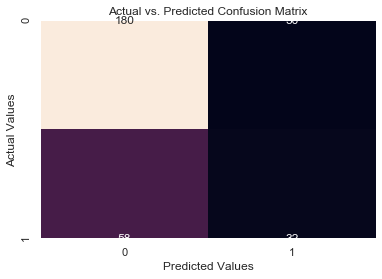

In [81]:
conf_mat = create_conf_mat(y_test,y_pred_LR)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Naive Bayes

In [82]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(roc_auc_score(y_test,y_pred_nb))
Model.append('Naive Bayes')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_nb))

0.6261904761904763


In [83]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78       210
           2       0.48      0.47      0.47        90

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.69      0.69      0.69       300



In [84]:
Model,ROC_AUC_Accuracy

(['Logistic Regression', 'Naive Bayes'],
 [0.6063492063492064, 0.6261904761904763])

In [85]:
results=confusion_matrix(y_test,y_pred_nb)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred_nb) )
print ('Report : ')
print (classification_report(y_test,y_pred_nb) )

Confusion Matrix :
[[165  45]
 [ 48  42]]
Accuracy Score : 0.69
Report : 
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       210
           2       0.48      0.47      0.47        90

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.69      0.69      0.69       300



In [86]:
#Function to visulise confusion matrix
def draw_cm( y_test,y_pred_nb ):
    cm = metrics.confusion_matrix( y_test,y_pred_nb )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [87]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,y_pred_nb )

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[165  45]
 [ 48  42]]


In [88]:
def create_conf_mat(y_test,y_pred_nb):
    if (len(y_test.shape) != len(y_pred_nb.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_nb.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                       columns = y_pred_nb)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

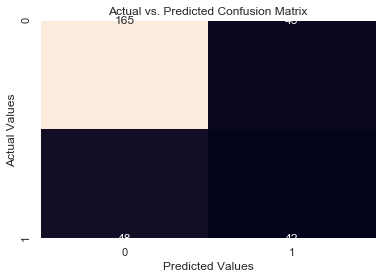

In [89]:
conf_mat = create_conf_mat(y_test,y_pred_nb)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Decision Tree

In [91]:
params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

rs = RandomizedSearchCV(estimator=dt,n_jobs=-1,cv=3,param_distributions=params,scoring='recall')
rs.fit(x,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [92]:
dt = DecisionTreeClassifier(**rs.best_params_)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(roc_auc_score(y_test,y_pred_dt))
Model.append('Decision Tree')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_dt))

0.5


In [93]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82       210
           2       0.00      0.00      0.00        90

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [94]:
Model,ROC_AUC_Accuracy

(['Logistic Regression', 'Naive Bayes', 'Decision Tree'],
 [0.6063492063492064, 0.6261904761904763, 0.5])

In [95]:
results=confusion_matrix(y_test,y_pred_dt)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred_dt) )
print ('Report : ')
print (classification_report(y_test,y_pred_dt) )

Confusion Matrix :
[[210   0]
 [ 90   0]]
Accuracy Score : 0.7
Report : 
              precision    recall  f1-score   support

           1       0.70      1.00      0.82       210
           2       0.00      0.00      0.00        90

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [96]:
#Function to visulise confusion matrix
def draw_cm( y_test,y_pred_dt):
    cm = metrics.confusion_matrix( y_test,y_pred_dt )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [97]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,y_pred_dt )

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[210   0]
 [ 90   0]]


In [98]:
def create_conf_mat(y_test,y_pred_dt):
    if (len(y_test.shape) != len(y_pred_dt.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_dt.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                       columns = y_pred_dt)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

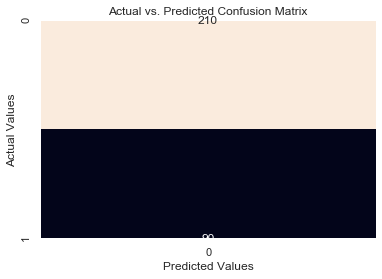

In [99]:
conf_mat = create_conf_mat(y_test,y_pred_dt)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Random Forest

In [101]:
params = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

rs = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=5,scoring='recall',n_jobs=-1)
rs.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [102]:
rf = RandomForestClassifier(**rs.best_params_)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(roc_auc_score(y_test,y_pred_rf))
Model.append('Random Forest')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_rf))

0.5055555555555555


In [103]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83       210
           2       1.00      0.01      0.02        90

    accuracy                           0.70       300
   macro avg       0.85      0.51      0.42       300
weighted avg       0.79      0.70      0.58       300



In [104]:
results=confusion_matrix(y_test,y_pred_rf)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred_rf) )
print ('Report : ')
print (classification_report(y_test,y_pred_rf) )

Confusion Matrix :
[[210   0]
 [ 89   1]]
Accuracy Score : 0.7033333333333334
Report : 
              precision    recall  f1-score   support

           1       0.70      1.00      0.83       210
           2       1.00      0.01      0.02        90

    accuracy                           0.70       300
   macro avg       0.85      0.51      0.42       300
weighted avg       0.79      0.70      0.58       300



In [105]:
#Function to visulise confusion matrix
def draw_cm( y_test,y_pred_rf ):
    cm = metrics.confusion_matrix( y_test,y_pred_rf )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [106]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,y_pred_rf )
print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[210   0]
 [ 89   1]]


In [107]:
def create_conf_mat(y_test,y_pred_rf):
    if (len(y_test.shape) != len(y_pred_rf.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_rf.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                       columns = y_pred_rf)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb


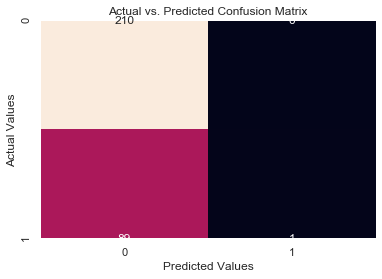

In [108]:
conf_mat = create_conf_mat(y_test,y_pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [109]:
Model,ROC_AUC_Accuracy

(['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
 [0.6063492063492064, 0.6261904761904763, 0.5, 0.5055555555555555])

### According to accuracy naive bayes and Random Forest according to data set because of varies factors effecting the outcome. 

### Which are the top 3 features according to the selected model importance?

## VIF

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x.values, j) for j in range(1, x.shape[1])]

[7.623476716015454,
 5.94340796032343,
 3.2090084128979215,
 5.10202638454838,
 4.7728968310698905,
 2.5720502351844954,
 10.015850131093122,
 3.4463988195940685,
 17.540383871039552,
 8.475986112175615,
 3.15577308417293,
 5.589922491491183,
 5.9474685725882885,
 7.823117350709668,
 3.4464620186994974,
 11.521329963878467,
 2.0949929120041806,
 24.313874102778524,
 11.673199112547326]

In [120]:
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.",i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:",a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)


In [121]:
train_out = calculate_vif(x)

Iteration no. 1
[2.72051775038403, 7.623476716015454, 5.94340796032343, 3.2090084128979215, 5.10202638454838, 4.7728968310698905, 2.5720502351844954, 10.015850131093122, 3.4463988195940685, 17.540383871039552, 8.475986112175615, 3.15577308417293, 5.589922491491183, 5.9474685725882885, 7.823117350709668, 3.4464620186994974, 11.521329963878467, 2.0949929120041806, 24.313874102778524, 11.673199112547326]
Max VIF is for variable no.: 18
Iteration no. 2
[2.718643322491827, 7.5227829033846785, 5.835891556072665, 3.1264103286994396, 5.0947932523343935, 4.764509347526022, 2.5491728322055143, 9.776228477616332, 3.443056371077391, 16.24394610620751, 8.317286977063672, 3.1271684189204976, 5.548948183843068, 5.894347746394914, 7.681284463865352, 3.4396488152128493, 11.43558271993506, 2.0779452628517694, 11.389691485818533]
Max VIF is for variable no.: 9
Iteration no. 3
[2.6724596993871854, 7.511723656962794, 5.649532606191606, 3.1248798086354173, 5.094776977977279, 4.711362748194814, 2.53429600651

In [122]:
## includes only the relevant features.
train_out.head()

,Status of existing checking account,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Personal status and sex,Property,Housing,Job,Telephone
0,1,1,7,1169,4,3,3,2,1,1,1
1,0,3,7,5951,2,0,0,2,1,1,0
2,3,1,4,2096,2,1,3,2,1,3,0
3,1,3,5,7882,2,1,3,0,0,1,0
4,1,2,1,4870,2,0,3,3,0,1,0


In [123]:
train_out.columns

Index(['Status of existing checking account', 'Credit history', 'Purpose',
       'Credit amount', 'Savings account/bonds', 'Present employment since',
       'Personal status and sex', 'Property', 'Housing', 'Job', 'Telephone'],
      dtype='object')

In [124]:
train_out.shape

(1000, 11)

### Lasso

In [126]:
from sklearn.linear_model import LassoCV, Lasso
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.200061
Best score using built-in LassoCV: 0.044736


In [127]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 18 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

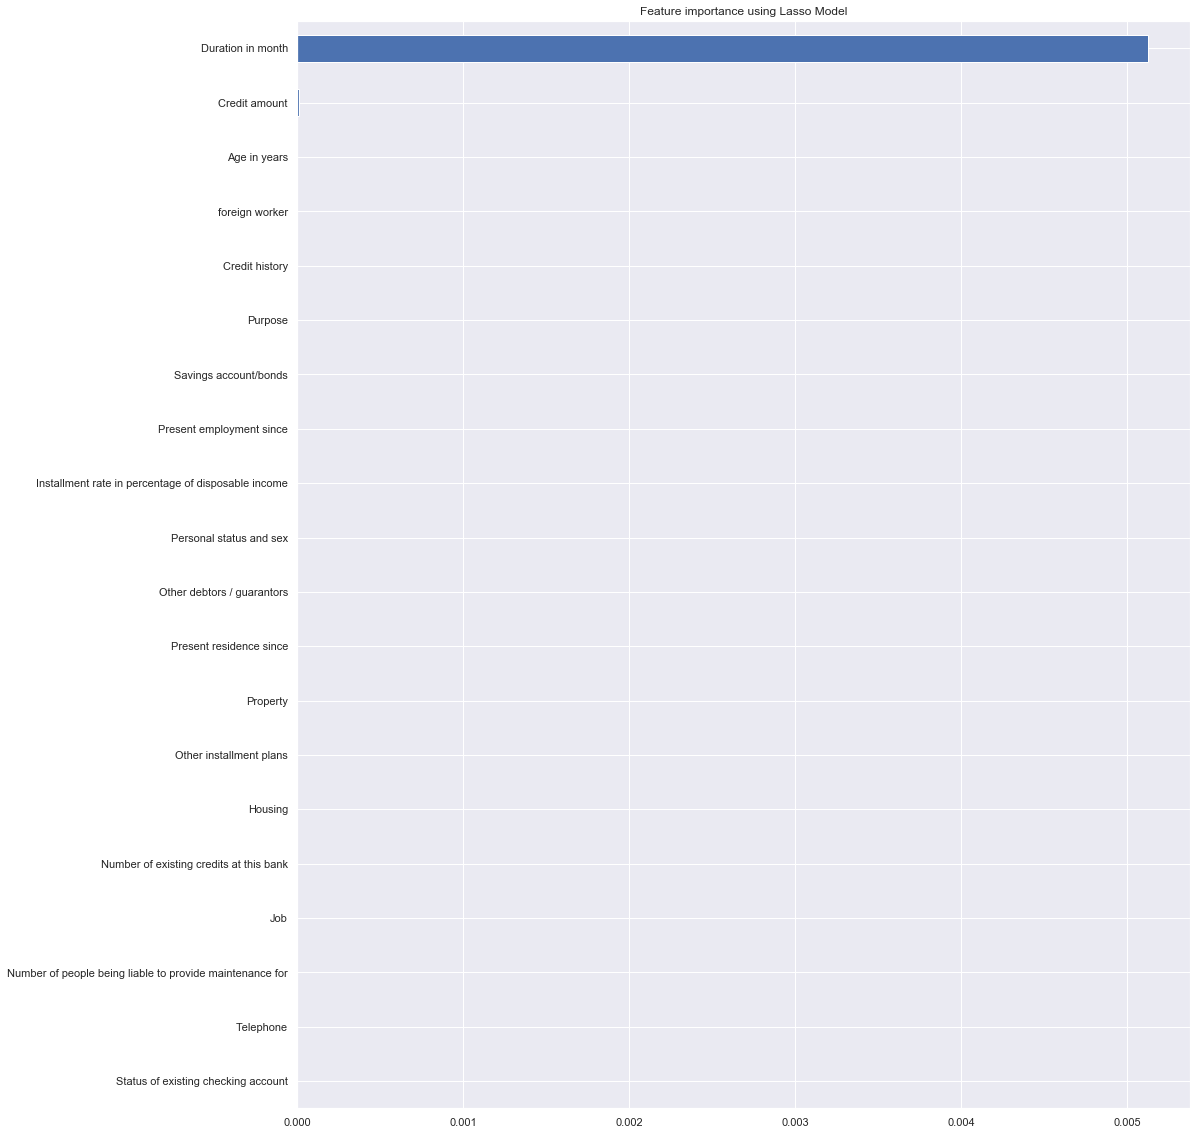

In [128]:
imp_coef = coef.sort_values()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### From the data set most effectively used feature are status of existing checking account, Credit history, Credit amount

#### Based on the selected model, provide a description of the “best” credit-worthy person.

Best Credit worthy person should have the following parameters: 

    person is foreign worker, 

    Personal status and sex :male : divorced/separated
    
    Present employment 1-4 years of experience 
    
    Savings account 100-500
    
    purpose is education
    
    Credit history is no credits taken/ all credits paid back duly or critical account/ other credits existing
    
    Status of existing checking account 0-200
    
    No.of Credits is 1